# Access DataSet from Google Drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd 'drive/MyDrive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/facial-emotion-expressions/images/images/'
/content/drive/MyDrive


# Import all necessary packages and Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input
from tensorflow.keras.utils import Sequence


In [ ]:
import cv2
import os
def loaddata():
   
    label_names = ['angry',  'disgust',  'fear',  'happy'  ,'neutral', 'sad','surprise']
    tpath="facial-emotion-expressions/images/images/train/"
    train_images=[]
    train_labels=[]

    for folder in os.listdir(tpath):
        files=tpath+'/'+str(folder)
        label = label_names.index(folder)
        for file in os.listdir(files):
            file = files+"/"+file
            #read the image
            image = cv2.imread(file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (48,48))
            image=image.reshape(48,48,)
            # Append the image and its corresponding label to the output
            train_images.append(image)
            train_labels.append(label)

    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    return train_images,train_labels

In [ ]:
def loadvaldata():    
    label_names = ['angry',  'disgust',  'fear',  'happy'  ,'neutral', 'sad','surprise']
    vpath = "facial-emotion-expressions/images/images/validation/"
    validation_images=[]
    validation_labels=[]

    for folder in os.listdir(vpath):
        files=vpath+'/'+str(folder)
        label = label_names.index(folder)
        for file in os.listdir(files):
            file = files+"/"+file
            #read the image
            image = cv2.imread(file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (48,48))
            image=image.reshape(48,48,)
            # Append the image and its corresponding label to the output
            validation_images.append(image)
            validation_labels.append(label)
    validation_images = np.array(validation_images)
    validation_labels = np.array(validation_labels)
    return validation_images,validation_labels

In [ ]:

(train_images,train_labels)=loaddata()
(validation_images,validation_labels)=loadvaldata()


In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
print(unique)
print(counts)

[]
[]


In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path


plt.imshow(train_images[5000])
plt.show()

IndexError: ignored

Text(0.5, 1.0, 'No of Train Data avaliable for each class')

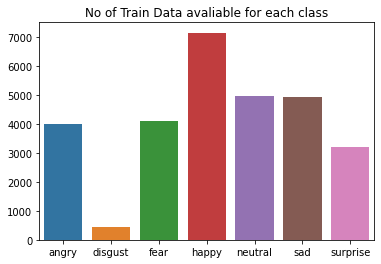

In [ ]:
import seaborn as sns
label_names = ['angry',  'disgust',  'fear',  'happy'  ,'neutral', 'sad','surprise']
unique, counts = np.unique(train_labels, return_counts=True)
sns.barplot(x = label_names, y = counts )
plt.title('No of Train Data avaliable for each class')

Text(0.5, 1.0, 'No of Validation Data avaliable for each class')

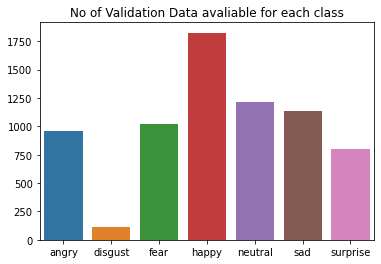

In [ ]:
unique, counts = np.unique(validation_labels, return_counts=True)
sns.barplot(x = label_names, y = counts )
plt.title('No of Validation Data avaliable for each class')

In [ ]:

img_input = layers.Input(shape=(48, 48, 1))

x = layers.Conv2D(300, 3, activation='relu')(img_input)
x = layers.Conv2D(100, 3, activation='relu')(x)
x = layers.Conv2D(200, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(100, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(50, 3, activation='relu')(x)
x = layers.Conv2D(50, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


x = layers.Flatten()(x)
output = layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(inputs = [img_input], outputs = [output])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 300)       3000      
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 100)       270100    
                                                                 
 conv2d_8 (Conv2D)           (None, 42, 42, 200)       180200    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 21, 200)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 19, 19, 100)       180100    
                                                           

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])

In [ ]:
history=model.fit(train_images,train_labels,batch_size=16,epochs=20,validation_data=(validation_images,validation_labels))

Epoch 1/20
1802/1802 [==============================] - 48s 25ms/step - loss: 1.8265 - acc: 0.2546 - val_loss: 1.7442 - val_acc: 0.2903
Epoch 2/20
1802/1802 [==============================] - 37s 21ms/step - loss: 1.6466 - acc: 0.3537 - val_loss: 1.5249 - val_acc: 0.4028
Epoch 3/20
1802/1802 [==============================] - 40s 22ms/step - loss: 1.4552 - acc: 0.4377 - val_loss: 1.4273 - val_acc: 0.4577
Epoch 4/20
1802/1802 [==============================] - 40s 22ms/step - loss: 1.3478 - acc: 0.4845 - val_loss: 1.3728 - val_acc: 0.4812
Epoch 5/20
1802/1802 [==============================] - 42s 23ms/step - loss: 1.2754 - acc: 0.5140 - val_loss: 1.3035 - val_acc: 0.5067
Epoch 6/20
1802/1802 [==============================] - 37s 20ms/step - loss: 1.2779 - acc: 0.5120 - val_loss: 1.2939 - val_acc: 0.5164
Epoch 7/20
1802/1802 [==============================] - 37s 21ms/step - loss: 1.1751 - acc: 0.5554 - val_loss: 1.2772 - val_acc: 0.5267
Epoch 8/20
1802/1802 [==========================

Text(0.5, 1.0, 'Training and validation loss')

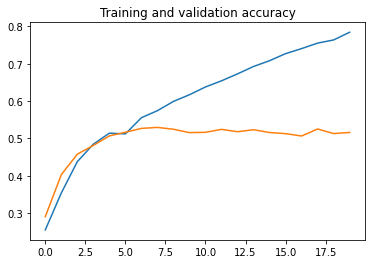

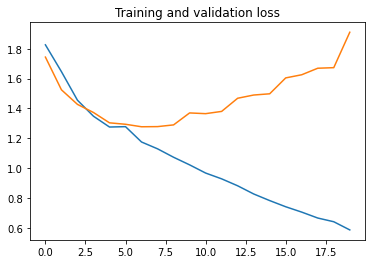

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')